# ENSO
The influence of ENSO on the climate system

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

We will use the NOAA Extended Reconstructed Sea Surface Temperature (ERSST) v5 product.

In [2]:
file = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(file, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1979', '2024')).load() # select data only from 1979 to 2023
sst = ds.sst
ds.time

<xarray.DataArray 'time' (time: 550)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2024-08-01T00:00:00.000000000',
       '2024-09-01T00:00:00.000000000', '2024-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-10-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 82088.]
    _ChunkSizes:      1

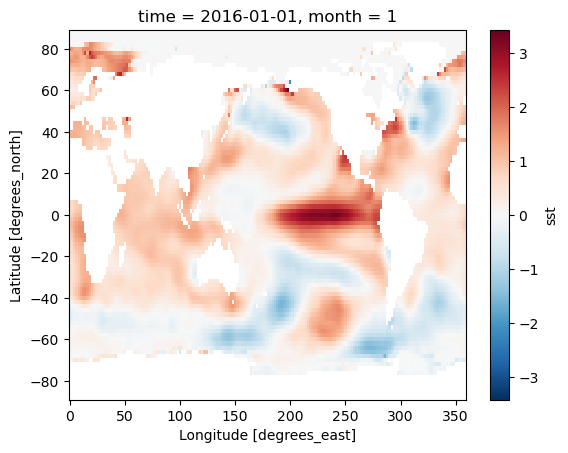

In [4]:
# calculate climatological mean
sst_clim=sst.groupby("time.month").mean(dim="time")
# calculate anomaly
sst_anom = sst.groupby("time.month") - sst_clim

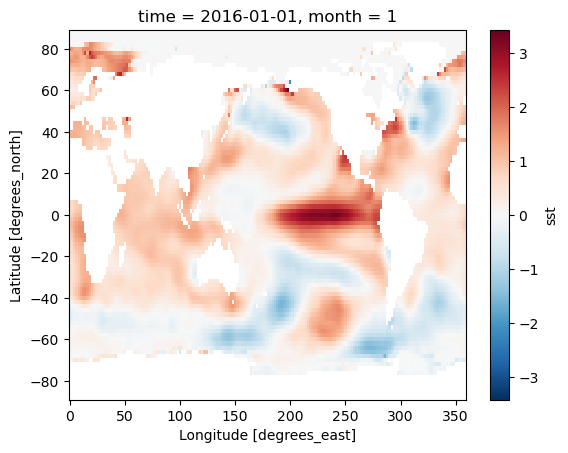

In [5]:
# SST during the El Nino year
sst_anom.sel(time="2016-01").plot() 

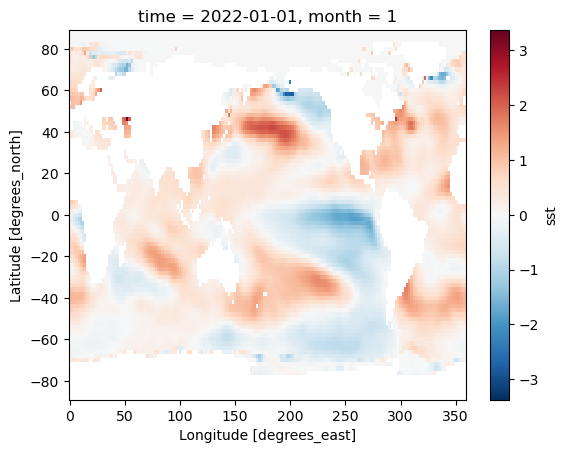

In [6]:
# SST during the El Nino year
sst_anom.sel(time="2022-01").plot() 

In [8]:
# Below is how to read the GPCP precipitation data. We are not using this data here, but I kept it hear in case anyone needs it. 
#file4 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
#with xr.open_dataset(file4) as ds4:
#    print(ds4)

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 550, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-10-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/20)
    Conventions:                     CF-1.0
    curator:                         Dr. Jian-Jian Wang\nESSIC, University of...
    citation:                        Adler, R.F., G.J. Huffman, A. Chang, R. ...
    title:                           GPCP Version 2.3 Combined Precipitation ...
    platform:                        NOAA POES (Polar Orbiting Environmental ...
    source_obs:                      CDR RSS SSMI/SSMIS Tbs over ocean \nCDR ...
    

### Exercise 1
Plot a contour map of January 1998 SST anomaly.

### Exercise 2
Plot a contour map of January 1998 SST anomaly. Explain the SST pattern above. 

## Tropospheric temperature (optional exercises)
Plot a contour map of January 1998 air temperature anomaly at 500hPa. First, let's open the dataset.

In [8]:
file2='http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasetsncep.reanalysis/Monthlies/pressure/air.mon.mean.nc'
with xr.open_dataset(file2) as ds2:
    print(ds2)

<xarray.Dataset>
Dimensions:  (level: 17, lon: 144, time: 922, lat: 73)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-10-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    description:                      Data from NCEP initialized reanalysis (...
    platform:                        Model
    Conventions:                     COARDS
    NCO:                             20121012
    history:                         Mon Jul  5 21:45:36 1999: ncrcat air.mon...
    title:                           monthly mean air from the NCEP Reanalysis
    dataset_title:                   NCEP-NCAR Reanalysis 1
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.8.20
    References:            

### Optional Exercise 
Calculate the climatology (long-term monthly averages) of 500 hPa air temperature.

### Optional Exercise 
Calculate the monthly anomalies.

### Optional Exercise 
Plot 500 hPa temperature anoaly for January 1998.

### Optional Exercise 
Plot 500 hPa temperature anoaly for September 1997, November 1997, January 1998, and March 1998.

### Optional Exercise 
Explain how temperature anomalies evlove through time.

### Optional Exercise 
Calculate and plot the surface wind anomalies for January 1998. Describe the anomalous circulation near the surface. 
Use the following data: 
'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasetsncep.reanalysis/Monthlies/surface/uwnd.mon.mean.nc'
'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasetsncep.reanalysis/Monthlies/surface/vwnd.mon.mean.nc'